In [18]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start, end):
    """
    Find the shortest path between `start` and `end` nodes in a weighted graph using Dijkstra's algorithm.
    :param graph: dictionary representing the graph, where each key is a node and the value is a list of tuples representing the connected nodes and their weights
    :param start: the starting node
    :param end: the destination node
    :return: a tuple of two items: the shortest distance between `start` and `end`, and the path between them
    """
    # create a dictionary to store the distances to all nodes and initialize with infinite distance to all nodes
    distances = {node: float('inf') for node in graph}
    # set the distance to the starting node to 0
    distances[start] = 0
    # create a dictionary to store the path to all nodes and initialize with empty path to all nodes
    paths = {node: [] for node in graph}
    # create a heap to store the nodes to be visited, where the key is the distance to the node
    heap = [(0, start)]
    
    while heap:
        # get the node with the smallest distance from the heap
        current_distance, current_node = heapq.heappop(heap)
        
        # check if the current node is the destination node
        if current_node == end:
            # return the shortest distance and the path to the destination node
            return current_distance, paths[end] + [end]
        
        # check if the current node has already been visited
        if current_distance > distances[current_node]:
            continue
        
        # visit the neighbors of the current node
        for neighbor, weight in graph[current_node]:
            # calculate the distance to the neighbor node
            distance = current_distance + weight
            # check if the new distance is shorter than the current distance to the neighbor node
            if distance < distances[neighbor]:
                # update the distance and path to the neighbor node
                distances[neighbor] = distance
                paths[neighbor] = paths[current_node] + [current_node]
                # add the neighbor node to the heap
                heapq.heappush(heap, (distance, neighbor))
    
    # if the destination node is not reachable from the starting node, return None
    return None





### Simple Graph

Shortest distance from A to F: 10
Shortest path: A -> C -> D -> F


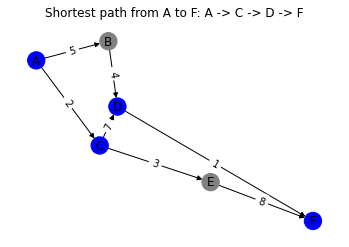

In [14]:
# example usage
graph = {
    'A': [('B', 5), ('C', 2)],
    'B': [('D', 4)],
    'C': [('D', 7), ('E', 3)],
    'D': [('F', 1)],
    'E': [('F', 8)],
    'F': []
}

start = 'A'
end = 'F'

distance, path = dijkstra(graph, start, end)

# print the shortest distance and path
print(f"Shortest distance from {start} to {end}: {distance}")
print(f"Shortest path: {' -> '.join(path)}")

G = nx.DiGraph()

for node, edges in graph.items():
    for edge, weight in edges:
        G.add_edge(node, edge, weight=weight)

# set the positions of the nodes
pos = nx.spring_layout(G)

# color the nodes in the shortest path
node_colors = ['blue' if node in path else 'gray' for node in G.nodes()]

# set the edge labels to the weights
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}

# draw the graph
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos)

plt.title(f"Shortest path from {start} to {end}: {' -> '.join(path)}")
plt.axis('off')
plt.show()

### Three atributes
1- distance
2- extreme weather
3- Gas emission

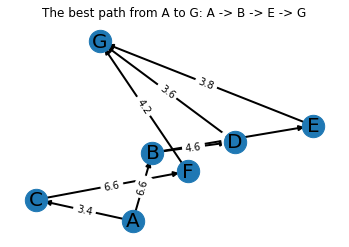

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph
graph = {
    'A': [('B', {'distance': 10, 'weather': 5, 'emission': 7}),
          ('C', {'distance': 3, 'weather': 2, 'emission': 6})],
    'B': [('D', {'distance': 2, 'weather': 6, 'emission': 4}),
          ('E', {'distance': 4, 'weather': 1, 'emission': 8})],
    'C': [('F', {'distance': 6, 'weather': 9, 'emission': 3})],
    'D': [('G', {'distance': 5, 'weather': 4, 'emission': 2})],
    'E': [('G', {'distance': 4, 'weather': 3, 'emission': 5})],
    'F': [('G', {'distance': 7, 'weather': 5, 'emission': 1})]
}

# set default weights for the criteria
distance_weight = 0.5
weather_weight = 0.3
emission_weight = 0.2

# get user input for the weights
dist_weight = float(input("Enter weight for distance (default 0.5): ") or distance_weight)
weather_weight = float(input("Enter weight for extreme weather (default 0.3): ") or weather_weight)
emission_weight = float(input("Enter weight for gas emission (default 0.2): ") or emission_weight)

# create a weighted graph based on the criteria weights
weighted_graph = nx.DiGraph()
for node, edges in graph.items():
    for edge in edges:
        # get the edge attributes
        distance = edge[1]['distance']
        weather = edge[1]['weather']
        emission = edge[1]['emission']
        # calculate the weighted sum of the criteria
        weight = round(dist_weight*distance + weather_weight*weather + emission_weight*emission,3)
        weighted_graph.add_edge(node, edge[0], weight=weight)

# find the shortest path using Dijkstra's algorithm
start = input("Enter the starting node: ")
end = input("Enter the ending node: ")
shortest_path = nx.shortest_path(weighted_graph, source=start, target=end, weight='weight')

# visualize the graph and shortest path
pos = nx.spring_layout(weighted_graph)
nx.draw_networkx_nodes(weighted_graph, pos, node_size=500)
nx.draw_networkx_labels(weighted_graph, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edges(weighted_graph, pos, width=2)
edge_labels = nx.get_edge_attributes(weighted_graph,'weight')
nx.draw_networkx_edge_labels(weighted_graph, pos, edge_labels=edge_labels, font_size=10)

plt.title(f"The best path from {start} to {end}: {' -> '.join(shortest_path)}")
plt.axis('off')
plt.show()
